## **Descripción de las Variables**

### **Variables Numéricas (mediciones de laboratorio)**
- **CellSize** *(µm)* → Tamaño de la célula en micrómetros. 
- **CellShape** *(ratio)* → Relación de aspecto de la célula. 
- **NucleusDensity** *(g/cm³)* → Densidad del núcleo celular. 
- **ChromatinTexture** *(unidades arbitrarias)* → Textura de la cromatina. 
- **CytoplasmSize** *(µm)* → Tamaño del citoplasma.
- **CellAdhesion** *(0-1)* → Capacidad de adhesión celular. *(0: baja, 1: alta)*  
- **MitosisRate** *(eventos/unidad de tiempo)* → Frecuencia de mitosis observada.
- **NuclearMembrane** *(1-5)* → Estado de la membrana nuclear *(1: frágil, 5: íntegra)*.  
- **GrowthFactor** *(ng/mL)* → Concentración de factores de crecimiento.
- **OxygenSaturation** *(%)* → Nivel de oxigenación de la célula. 
- **Vascularization** *(0-10)* → Índice de vascularización celular. 
- **InflammationMarkers** *(0-100)* → Nivel de marcadores inflamatorios.

### **Variables Categóricas**
- **CellType** → Clasificación del tipo celular. *(`Epithelial`, `Mesenchymal`, `Unknown`)*  
- **GeneticMutation** → Presencia de mutaciones genéticas. *(`Present`, `Absent`, `Unknown`)*  

### **Variable Objetivo**
- **Diagnosis** *(0/1)* → Indica si la célula presenta características compatibles con la condición médica estudiada.  
  - `0` → Célula sin anomalías.  
  - `1` → Célula con características anómalas.  

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Trabajo Práctico 2: Clasificación y Ensemble Learning
# Autor: Matteo Musacchio

# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display, Markdown
from Problema_1.src.data_splitting import train_val_split
from Problema_1.src.preprocessing import handle_missing_values, one_hot_encoding, handle_outliers,min_max_normalize
from Problema_1.src.utils import pretty_print_df

# Configuración para visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')  # Actualizado para versiones recientes de seaborn
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Definimos la ruta base del proyecto
BASE_PATH = os.path.dirname(os.path.abspath('__file__'))

# Problema 1: Diagnóstico de Cáncer de Mama
display(Markdown("## Problema 1: Diagnóstico de Cáncer de Mama"))

# 1.1 Análisis Exploratorio de Datos
cell_balanced_dev = pd.read_csv(os.path.join(BASE_PATH, 'Problema_1', 'data', 'raw', 'cell_diagnosis_dev.csv'))
cell_balanced_test = pd.read_csv(os.path.join(BASE_PATH, 'Problema_1', 'data', 'raw', 'cell_diagnosis_test.csv'))
cell_imbalanced_dev = pd.read_csv(os.path.join(BASE_PATH, 'Problema_1', 'data', 'raw', 'cell_diagnosis_dev_imbalanced.csv'))
cell_imbalanced_test = pd.read_csv(os.path.join(BASE_PATH, 'Problema_1', 'data', 'raw', 'cell_diagnosis_test_imbalanced.csv'))

## Problema 1: Diagnóstico de Cáncer de Mama

### Análisis del dataset de desarrollo

#### Información general del dataset

### Información del dataset

| Columnas            | Tipo de dato   |   No nulos |
|:--------------------|:---------------|-----------:|
| CellSize            | float64        |       1333 |
| CellShape           | float64        |       1347 |
| NucleusDensity      | float64        |       1362 |
| ChromatinTexture    | float64        |       1366 |
| CytoplasmSize       | float64        |       1347 |
| CellAdhesion        | float64        |       1369 |
| MitosisRate         | float64        |       1343 |
| NuclearMembrane     | float64        |       1343 |
| GrowthFactor        | float64        |       1359 |
| OxygenSaturation    | float64        |       1375 |
| Vascularization     | float64        |       1347 |
| InflammationMarkers | float64        |       1358 |
| Diagnosis           | float64        |       1663 |
| CellType            | object         |       1407 |
| GeneticMutation     | object         |       1663 |

#### Estadísticas descriptivas

### Estadísticas descriptivas

|   CellSize |   CellShape |   NucleusDensity |   ChromatinTexture |   CytoplasmSize |   CellAdhesion |   MitosisRate |   NuclearMembrane |   GrowthFactor |   OxygenSaturation |   Vascularization |   InflammationMarkers |   Diagnosis |
|-----------:|------------:|-----------------:|-------------------:|----------------:|---------------:|--------------:|------------------:|---------------:|-------------------:|------------------:|----------------------:|------------:|
|  1333      | 1347        |       1362       |          1366      |       1347      |    1369        |    1343       |        1343       |      1359      |          1375      |       1347        |             1358      | 1663        |
|    83.2471 |    0.598657 |          2.09734 |            26.095  |         33.9898 |       0.5488   |       5.32648 |           2.82537 |        74.1264 |            93.1994 |          5.96802  |               47.726  |    0.450391 |
|   100.317  |    0.565438 |          4.98757 |            24.8422 |         32.8096 |       0.612232 |      11.5725  |           2.69796 |        77.8195 |            82.5742 |          5.64953  |               44.1337 |    0.497683 |
|  -100      |   -1.41304  |         -3       |            10      |          5      |      -4.46175  |     -50       |          -3.43899 |       -50      |           -10      |         -0.997057 |                0      |    0        |
|    66.5721 |    0.479758 |          1.39701 |            21.2791 |         26.3045 |       0.4564   |       2.77673 |           2.2545  |        58.1704 |            79.1306 |          4.78247  |               37.514  |    0        |
|    69.7043 |    0.498832 |          1.44503 |            22.0668 |         28.4483 |       0.474836 |       3.08025 |           2.41446 |        60.994  |            79.9873 |          5.0681   |               40.8592 |    0        |
|    72.6531 |    0.523018 |          1.48565 |            22.8233 |         30.5068 |       0.494613 |       3.42307 |           2.53434 |        63.0416 |            80.9869 |          5.34646  |               43.9135 |    1        |
|  1000      |    5.04857  |         50       |           263.793  |        299.351  |       5.02993  |     100       |          24.8718  |       563.623  |           807.181  |         54.5124   |              440.902  |    1        |

#### Valores faltantes por columna

|                     |   Missing Values |   Percentage |
|:--------------------|-----------------:|-------------:|
| CellSize            |              330 |      19.8437 |
| NuclearMembrane     |              320 |      19.2423 |
| MitosisRate         |              320 |      19.2423 |
| CellShape           |              316 |      19.0018 |
| CytoplasmSize       |              316 |      19.0018 |
| Vascularization     |              316 |      19.0018 |
| InflammationMarkers |              305 |      18.3403 |
| GrowthFactor        |              304 |      18.2802 |
| NucleusDensity      |              301 |      18.0998 |
| ChromatinTexture    |              297 |      17.8593 |
| CellAdhesion        |              294 |      17.6789 |
| OxygenSaturation    |              288 |      17.3181 |
| CellType            |              256 |      15.3939 |

#### Distribución de la variable objetivo (Diagnosis)

|   Diagnosis |   Cantidad |   Porcentaje |
|------------:|-----------:|-------------:|
|           0 |        914 |        54.96 |
|           1 |        749 |        45.04 |

#### Distribución de variables categóricas

#### Matriz de correlación

#### Correlación de las variables con el target (Diagnosis)

|                     |   Diagnosis |
|:--------------------|------------:|
| Diagnosis           |  1          |
| CytoplasmSize       |  0.0704579  |
| GrowthFactor        |  0.0656154  |
| CellSize            |  0.0636151  |
| OxygenSaturation    |  0.0237426  |
| CellShape           |  0.0199661  |
| Vascularization     |  0.00550234 |
| NucleusDensity      | -0.00147981 |
| ChromatinTexture    | -0.00554875 |
| CellAdhesion        | -0.0113413  |
| MitosisRate         | -0.046265   |
| NuclearMembrane     | -0.0698478  |
| InflammationMarkers | -0.075421   |

#### Detección de outliers en variables numéricas

### Detección de outliers

| Variable            |   Outliers | Porcentaje   |
|:--------------------|-----------:|:-------------|
| CellSize            |         88 | 5.29%        |
| CellShape           |         87 | 5.23%        |
| NucleusDensity      |        115 | 6.92%        |
| ChromatinTexture    |         65 | 3.91%        |
| CytoplasmSize       |         61 | 3.67%        |
| CellAdhesion        |         84 | 5.05%        |
| MitosisRate         |        109 | 6.55%        |
| NuclearMembrane     |         78 | 4.69%        |
| GrowthFactor        |         94 | 5.65%        |
| OxygenSaturation    |         90 | 5.41%        |
| Vascularization     |         73 | 4.39%        |
| InflammationMarkers |         53 | 3.19%        |

Análisis exploratorio completado. Se han generado visualizaciones en la carpeta del proyecto.

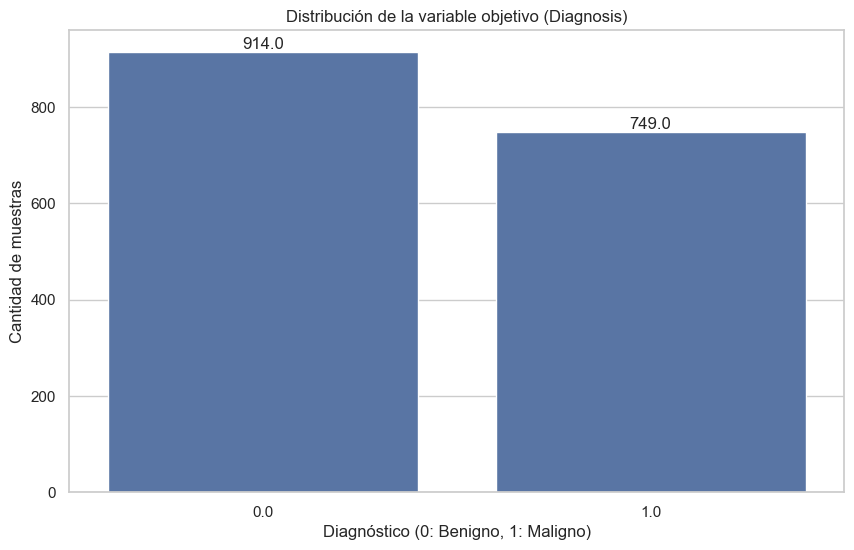

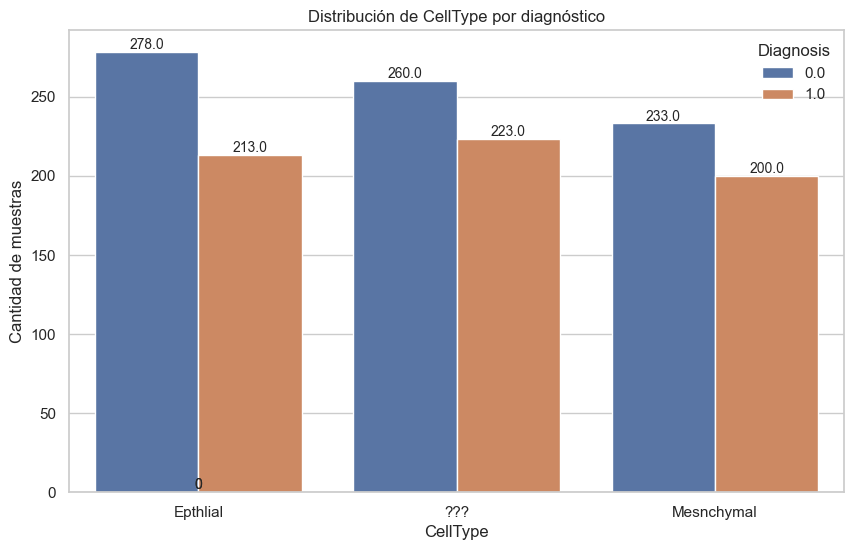

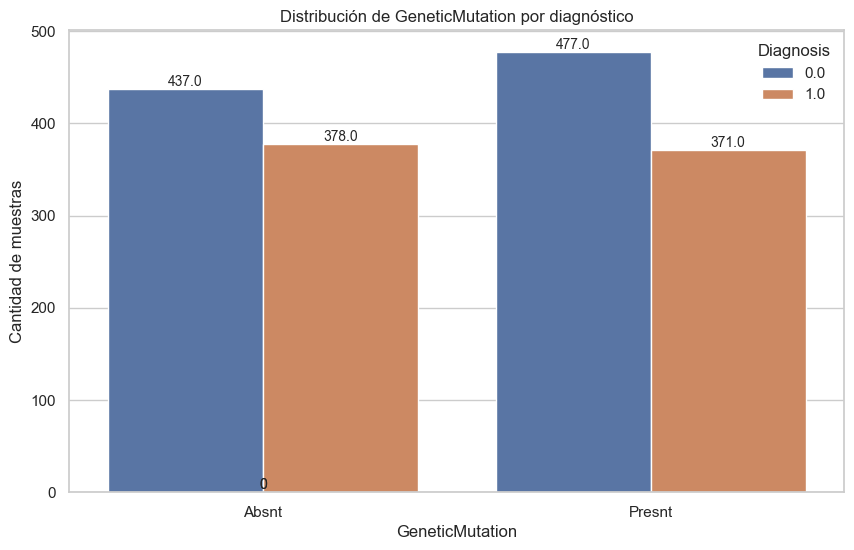

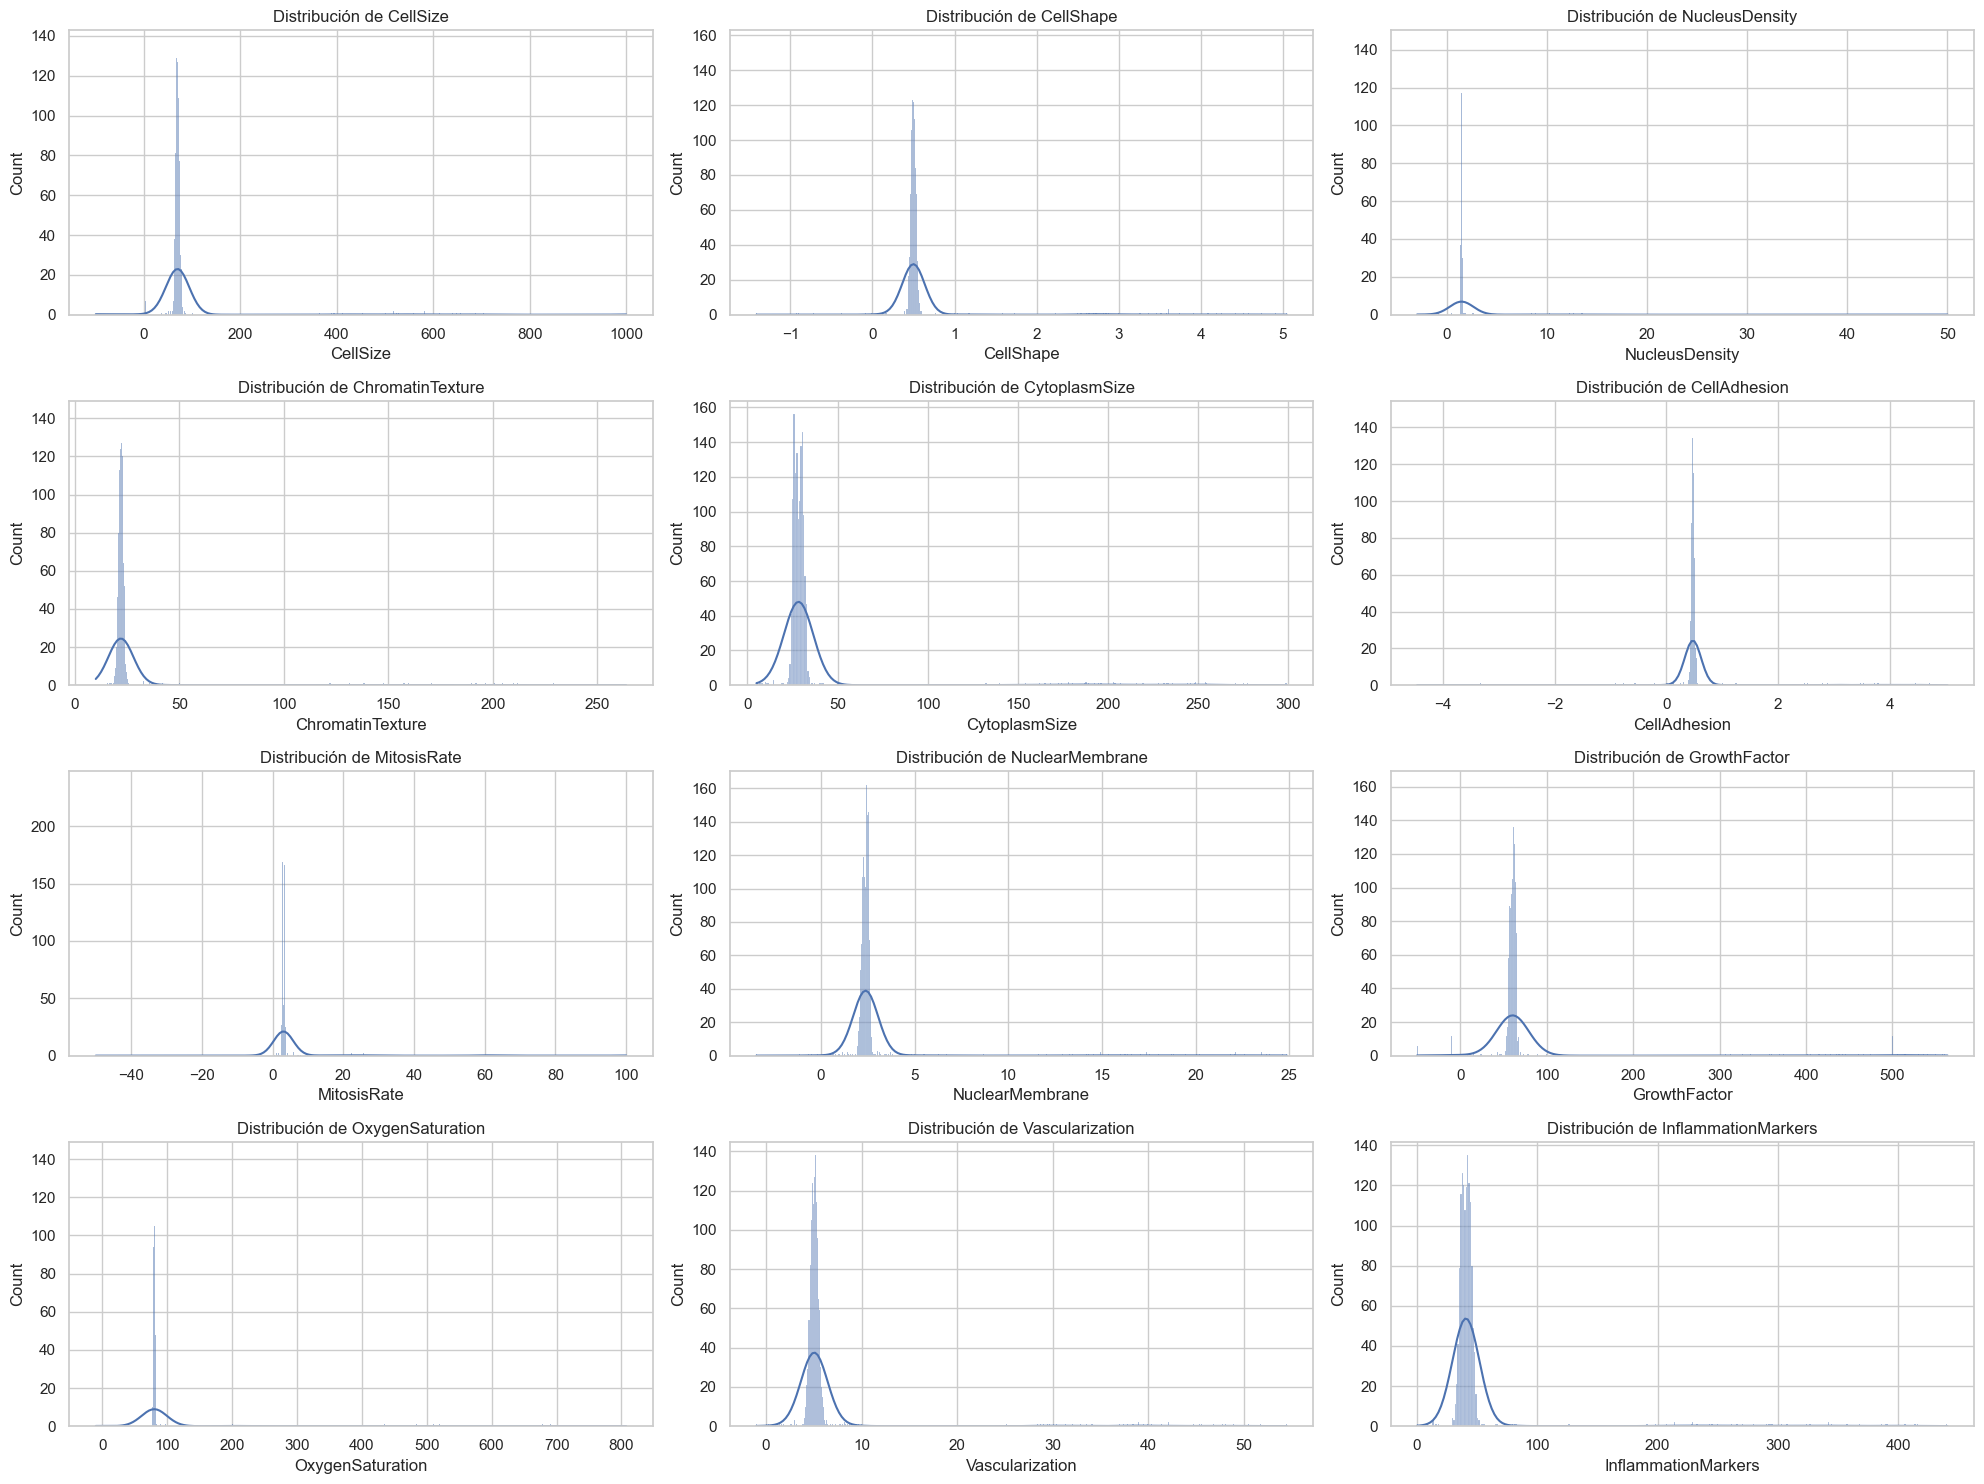

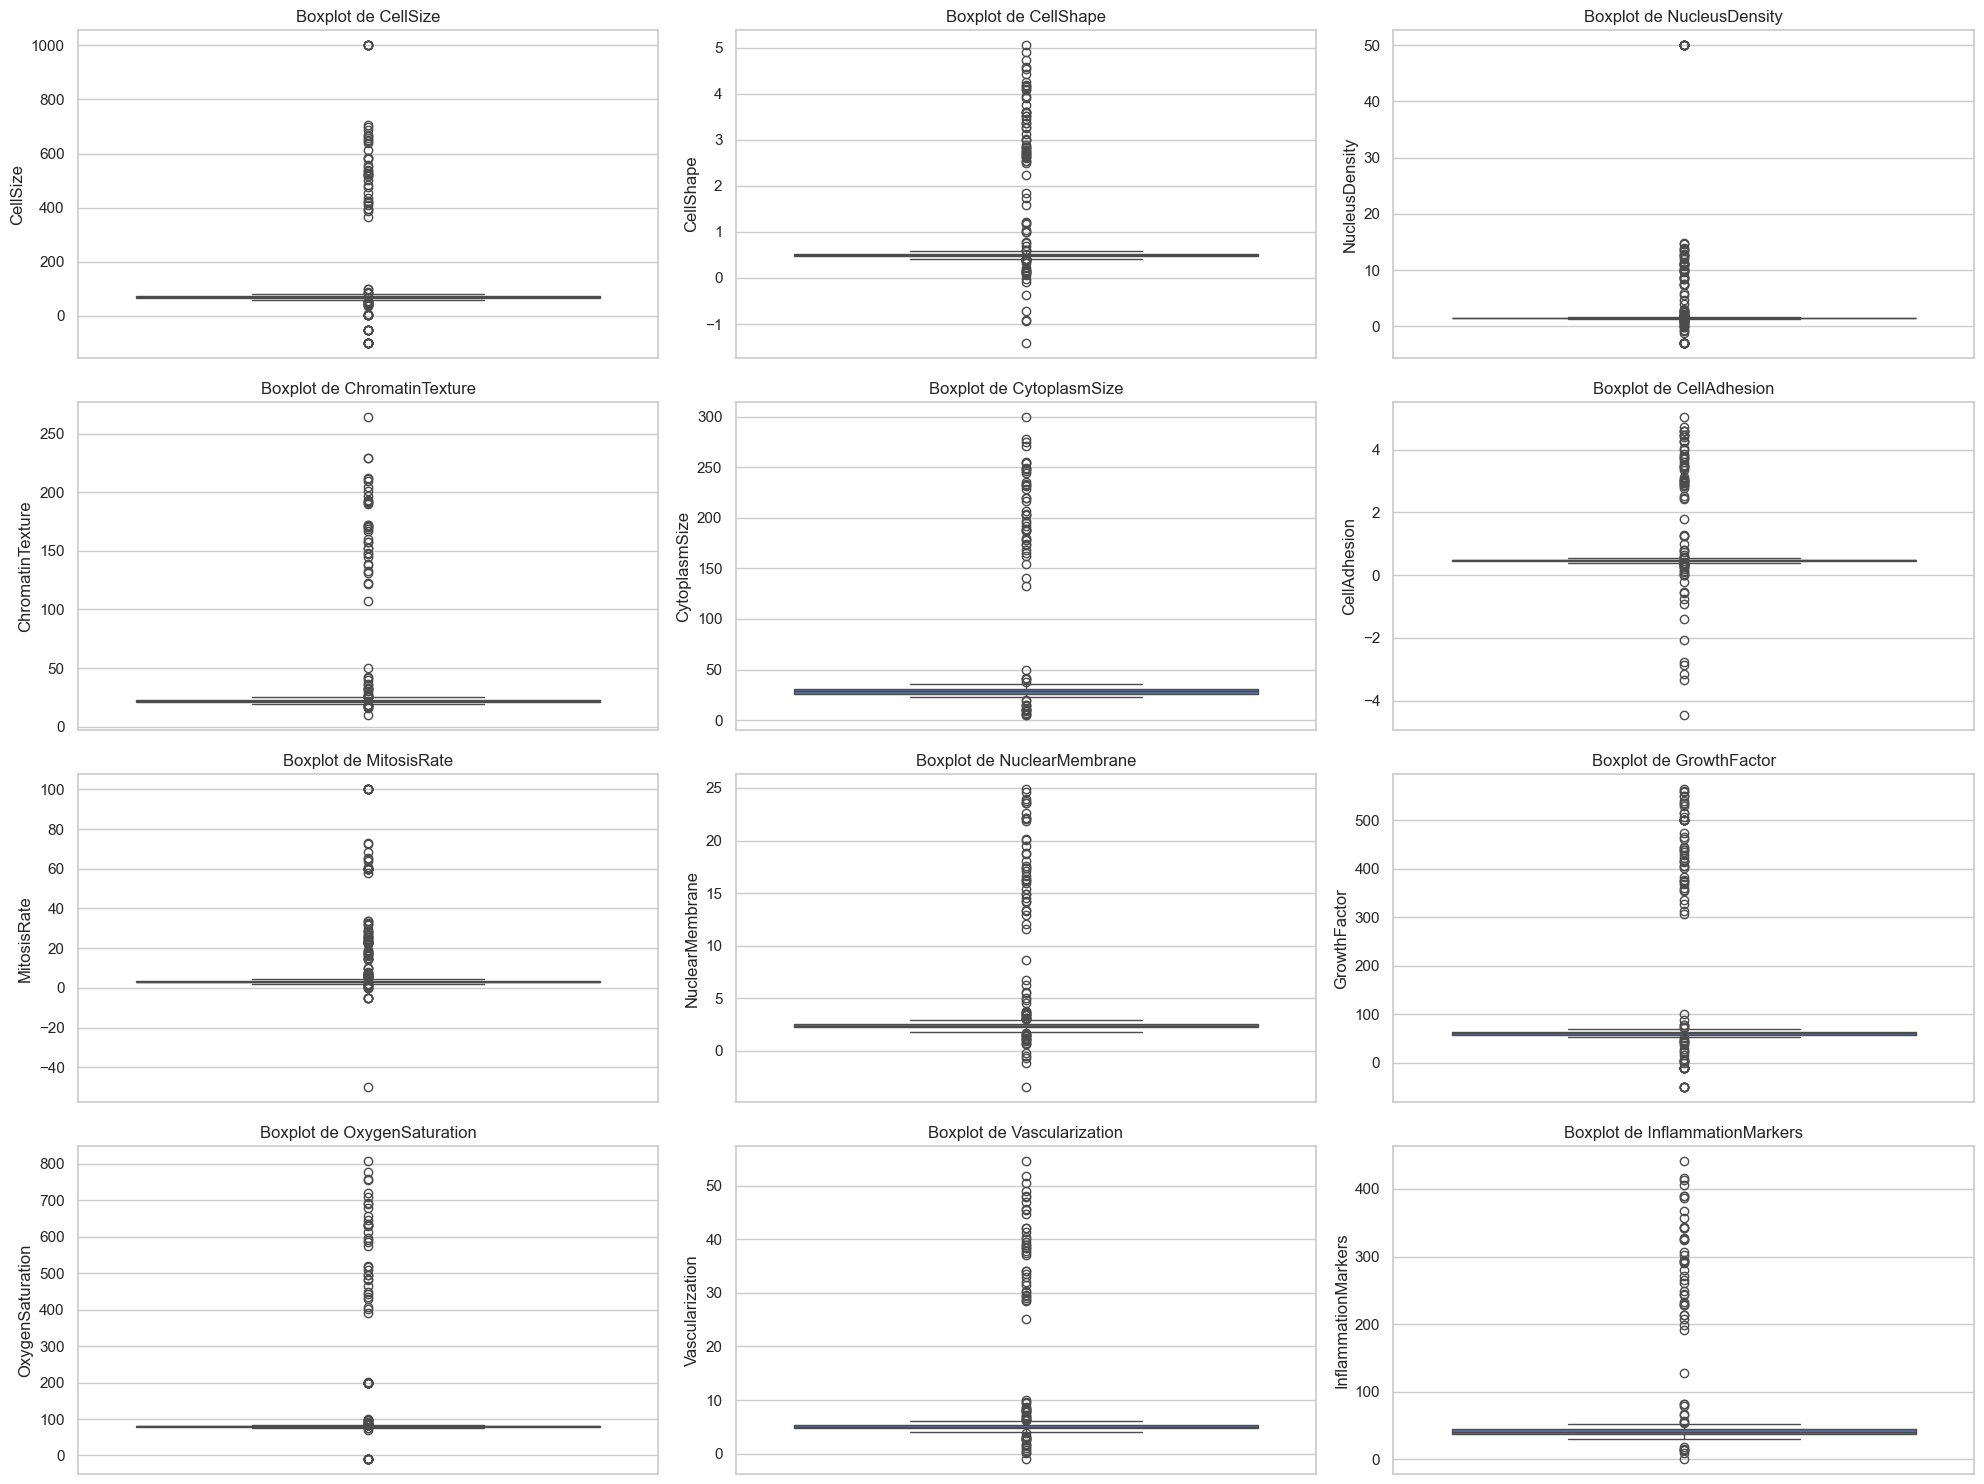

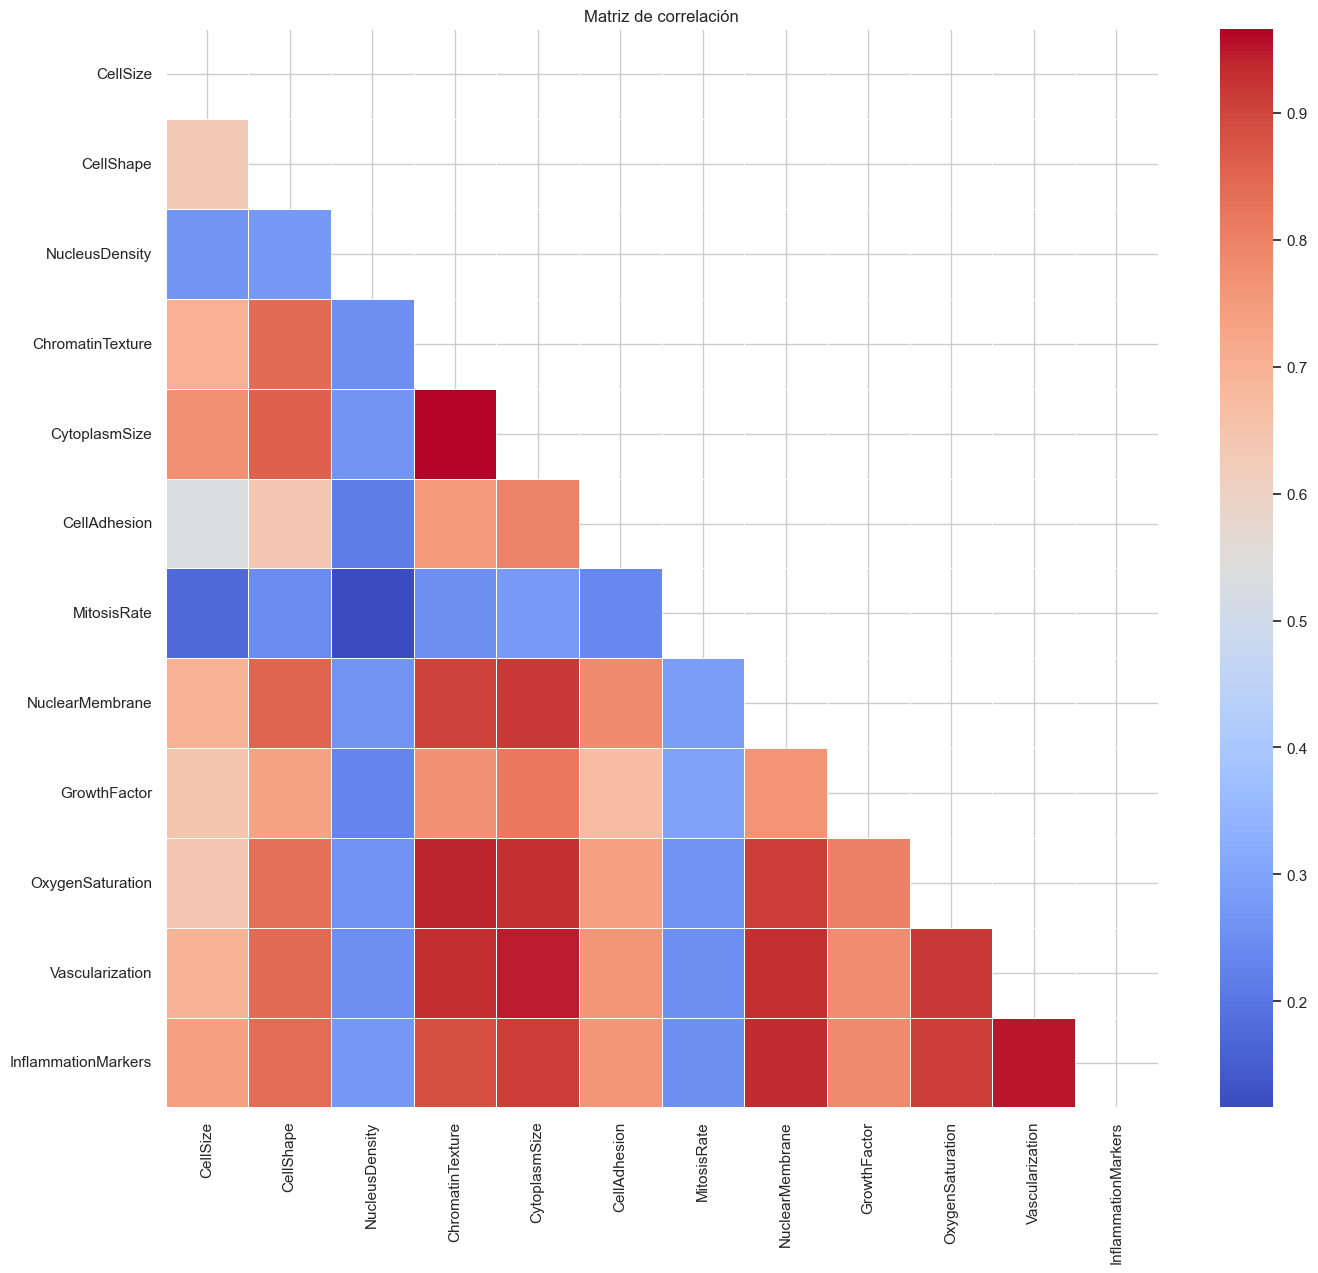

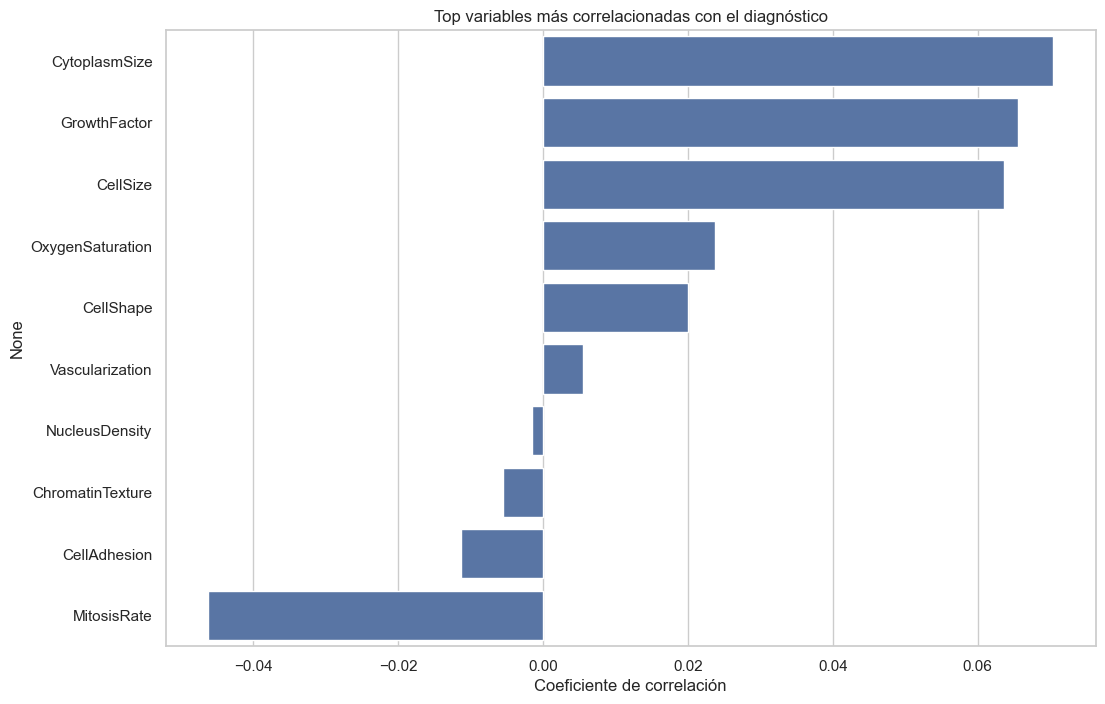

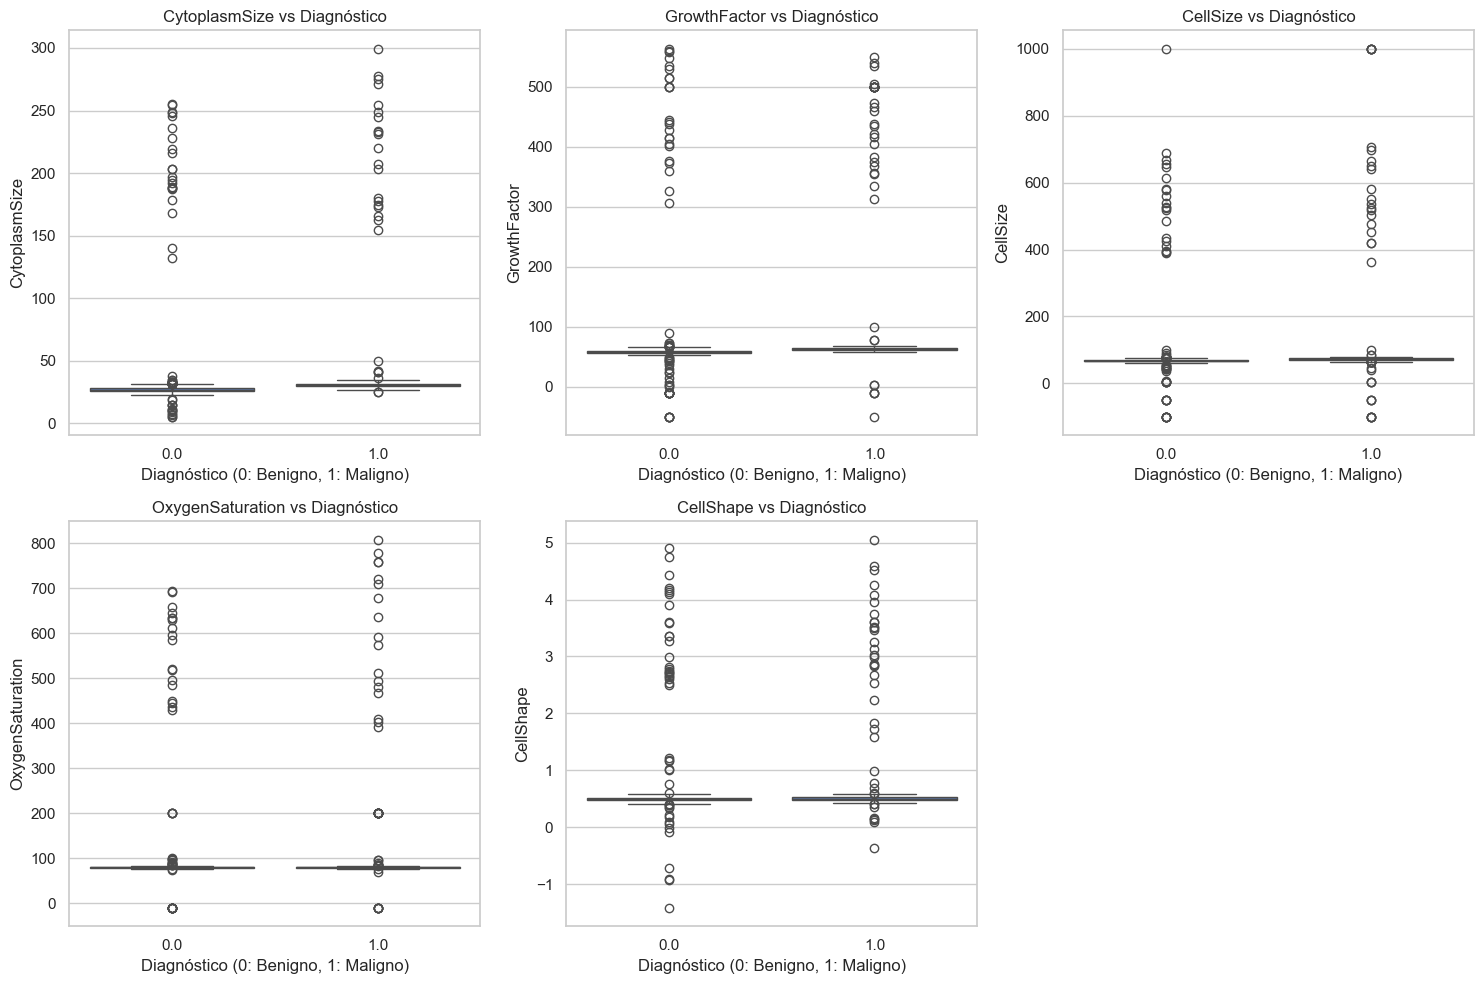

In [3]:
# Comenzamos con el análisis del dataset
display(Markdown("### Análisis del dataset de desarrollo"))

# Información general del dataset
display(Markdown("#### Información general del dataset"))
pretty_print_df(pd.DataFrame({
    'Columnas': cell_balanced_dev.columns,
    'Tipo de dato': cell_balanced_dev.dtypes,
    'No nulos': cell_balanced_dev.count()
}), title="Información del dataset")

# Estadísticas descriptivas
display(Markdown("#### Estadísticas descriptivas"))
pretty_print_df(cell_balanced_dev.describe(), title="Estadísticas descriptivas")

# Verificamos valores faltantes
display(Markdown("#### Valores faltantes por columna"))
missing_values = cell_balanced_dev.isnull().sum()
missing_percent = (missing_values / len(cell_balanced_dev)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
pretty_print_df(missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False), index=True)

# Verificamos la distribución de la variable objetivo (Diagnosis)
display(Markdown("#### Distribución de la variable objetivo (Diagnosis)"))
target_distribution = cell_balanced_dev['Diagnosis'].value_counts()
pretty_print_df(pd.DataFrame({
    'Diagnosis': target_distribution.index,
    'Cantidad': target_distribution.values,
    'Porcentaje': (target_distribution.values / len(cell_balanced_dev) * 100).round(2)
}))

# Visualizamos la distribución de la variable objetivo
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Diagnosis', data=cell_balanced_dev)
plt.title('Distribución de la variable objetivo (Diagnosis)')
plt.xlabel('Diagnóstico (0: Benigno, 1: Maligno)')
plt.ylabel('Cantidad de muestras')

# Añadimos etiquetas con los valores exactos
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

# Analizamos la distribución de las variables categóricas
categorical_features = ['CellType', 'GeneticMutation']
display(Markdown("#### Distribución de variables categóricas"))

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=feature, data=cell_balanced_dev, hue='Diagnosis')
    plt.title(f'Distribución de {feature} por diagnóstico')
    plt.xlabel(feature)
    plt.ylabel('Cantidad de muestras')
    
    # Añadimos etiquetas con los valores exactos
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)

# Analizamos la distribución de las variables numéricas
numeric_features = cell_balanced_dev.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Diagnosis' in numeric_features:
    numeric_features.remove('Diagnosis')

# Creamos histogramas para cada variable numérica
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features[:12], 1):  # Limitamos a 12 features por figura
    plt.subplot(4, 3, i)
    sns.histplot(cell_balanced_dev[feature], kde=True)
    plt.title(f'Distribución de {feature}')
plt.tight_layout()

# Si hay más de 12 features, creamos otra figura
if len(numeric_features) > 12:
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(numeric_features[12:], 1):
        plt.subplot(4, 3, i)
        sns.histplot(cell_balanced_dev[feature], kde=True)
        plt.title(f'Distribución de {feature}')
    plt.tight_layout()

# Identificamos posibles outliers usando boxplots
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features[:12], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=cell_balanced_dev[feature])
    plt.title(f'Boxplot de {feature}')
plt.tight_layout()

# Si hay más de 12 features, creamos otra figura para boxplots
if len(numeric_features) > 12:
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(numeric_features[12:], 1):
        plt.subplot(4, 3, i)
        sns.boxplot(y=cell_balanced_dev[feature])
        plt.title(f'Boxplot de {feature}')
    plt.tight_layout()

# Analizamos la correlación entre variables numéricas
display(Markdown("#### Matriz de correlación"))
correlation_matrix = cell_balanced_dev[numeric_features].corr()

# Visualizamos la matriz de correlación
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title('Matriz de correlación')

# Identificamos las variables más correlacionadas con el target
if 'Diagnosis' in cell_balanced_dev.columns:
    # Calculamos la correlación de cada feature con el target
    target_correlations = cell_balanced_dev[numeric_features + ['Diagnosis']].corr()['Diagnosis'].sort_values(ascending=False)
    display(Markdown("#### Correlación de las variables con el target (Diagnosis)"))
    pretty_print_df(target_correlations,index=True)

    # Visualizamos las 10 variables más correlacionadas con el target (o todas si hay menos de 10)
    plt.figure(figsize=(12, 8))
    top_correlations = target_correlations[1:min(11, len(target_correlations))]  # Excluimos la correlación del target consigo mismo
    sns.barplot(x=top_correlations.values, y=top_correlations.index)
    plt.title('Top variables más correlacionadas con el diagnóstico')
    plt.xlabel('Coeficiente de correlación')

# Visualizamos la relación entre las variables más correlacionadas y el target
if 'Diagnosis' in cell_balanced_dev.columns:
    top_features = target_correlations[1:6].index.tolist()  # Top 5 features
    
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(top_features, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(x='Diagnosis', y=feature, data=cell_balanced_dev)
        plt.title(f'{feature} vs Diagnóstico')
        plt.xlabel('Diagnóstico (0: Benigno, 1: Maligno)')
    plt.tight_layout()

# Análisis de valores extremos (outliers)
display(Markdown("#### Detección de outliers en variables numéricas"))
outliers_data = []
for feature in numeric_features:
    Q1 = cell_balanced_dev[feature].quantile(0.25)
    Q3 = cell_balanced_dev[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((cell_balanced_dev[feature] < lower_bound) | (cell_balanced_dev[feature] > upper_bound)).sum()
    if outliers > 0:
        outliers_data.append({
            'Variable': feature,
            'Outliers': outliers,
            'Porcentaje': f"{(outliers/len(cell_balanced_dev)*100):.2f}%"
        })

pretty_print_df(pd.DataFrame(outliers_data), title="Detección de outliers")

display(Markdown("Análisis exploratorio completado. Se han generado visualizaciones en la carpeta del proyecto."))

In [4]:
display(Markdown("## Entrenamiento y Evaluación del Modelo de Regresión Logística"))

# Importamos las clases y funciones necesarias
from Problema_1.src.models import LogisticRegression

# Separamos features y target
X = cell_balanced_dev.drop('Diagnosis', axis=1)
y = cell_balanced_dev['Diagnosis']

X = handle_outliers(X)


# Aplicamos one-hot encoding a las variables categóricas
display(Markdown("#### Aplicando one-hot encoding"))
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Columnas categóricas: {categorical_columns}")
X = one_hot_encoding(X, categorical_columns)
# Sumamos las columnas Celltype_Nan y CellType_Epthlial
X['CellType_Epthlial'] = X['CellType_Nan'] + X['CellType_Epthlial']
# Eliminamos las columnas originales después de combinarlas
X = X.drop(columns=['CellType_Nan', 'CellType_Mesnchymal','GeneticMutation_Absnt','GeneticMutation_Nan'])



# Manejamos valores faltantes
display(Markdown("#### Manejo de valores faltantes"))
X = handle_missing_values(X)


X['CellType_Epthlial'] = (X['CellType_Epthlial'] > 0.5).astype(int)

# Mostramos estadísticas básicas de las variables numéricas
display(Markdown("#### Estadísticas descriptivas de las variables numéricas"))
numeric_stats = X.describe()
pretty_print_df(numeric_stats,index=True)

# Dividimos los datos en train y validation
dev = pd.concat([X, y], axis=1)
train_df, val_df = train_val_split(dev, test_size=0.2)

# train_df, val_df, params = min_max_normalize(train_df, val_df, train_df.columns.drop(['Diagnosis','CellType_Epthlial','GeneticMutation_Presnt']).tolist())

# Guardamos el dataset procesado
display(Markdown("#### Guardando el dataset procesado"))

# Guardamos los datasets procesados
train_df.to_csv('Problema_1/data/processed/train.csv', index=False)
val_df.to_csv('Problema_1/data/processed/val.csv', index=False)

print("Datasets guardados exitosamente")

X_train = train_df.drop('Diagnosis', axis=1)
y_train = train_df['Diagnosis']
X_val = val_df.drop('Diagnosis', axis=1)
y_val = val_df['Diagnosis']


## Entrenamiento y Evaluación del Modelo de Regresión Logística

Columna 'CellSize': 83 outliers (4.99%)
Columna 'CellShape': 77 outliers (4.63%)
Columna 'NucleusDensity': 108 outliers (6.49%)
Columna 'ChromatinTexture': 53 outliers (3.19%)
Columna 'CytoplasmSize': 58 outliers (3.49%)
Columna 'CellAdhesion': 76 outliers (4.57%)
Columna 'MitosisRate': 105 outliers (6.31%)
Columna 'NuclearMembrane': 72 outliers (4.33%)
Columna 'GrowthFactor': 90 outliers (5.41%)
Columna 'OxygenSaturation': 81 outliers (4.87%)
Columna 'Vascularization': 66 outliers (3.97%)
Columna 'InflammationMarkers': 50 outliers (3.01%)


#### Aplicando one-hot encoding

Columnas categóricas: ['CellType', 'GeneticMutation']


#### Manejo de valores faltantes

#### Estadísticas descriptivas de las variables numéricas

|       |   CellSize |    CellShape |   NucleusDensity |   ChromatinTexture |   CytoplasmSize |   CellAdhesion |   MitosisRate |   NuclearMembrane |   GrowthFactor |   OxygenSaturation |   Vascularization |   InflammationMarkers |   CellType_Epthlial |   GeneticMutation_Presnt |
|:------|-----------:|-------------:|-----------------:|-------------------:|----------------:|---------------:|--------------:|------------------:|---------------:|-------------------:|------------------:|----------------------:|--------------------:|-------------------------:|
| count | 1663       | 1663         |     1663         |         1663       |      1663       |   1663         |   1663        |        1663       |     1663       |          1663      |       1663        |            1663       |         1663        |              1663        |
| mean  |   69.6614  |    0.4996    |        1.4398    |           22.0198  |        28.3976  |      0.474549  |      3.08074  |           2.3845  |       60.6065  |            80.0076 |          5.04877  |              40.6232  |            0.538785 |                 0.509922 |
| std   |    3.47033 |    0.0269471 |        0.0514738 |            1.01851 |         2.24789 |      0.0235905 |      0.315683 |           0.16155 |        2.79544 |             1.1575 |          0.352642 |               3.77439 |            0.498643 |                 0.500052 |
| min   |   55.5979  |    0.389644  |        1.19897   |           17.7073  |        18.7948  |      0.369101  |      1.66517  |           1.71592 |       47.8955  |            75.5829 |          3.82766  |              29.2306  |            0        |                 0        |
| 25%   |   67.2176  |    0.484873  |        1.40468   |           21.4152  |        26.6679  |      0.461362  |      2.80835  |           2.26171 |       58.8026  |            79.3339 |          4.8461   |              37.8638  |            0        |                 0        |
| 50%   |   69.6551  |    0.49944   |        1.43852   |           22.012   |        28.3899  |      0.474648  |      3.07162  |           2.38708 |       60.657   |            80.0091 |          5.05155  |              40.6082  |            1        |                 1        |
| 75%   |   71.9624  |    0.514194  |        1.47679   |           22.5819  |        30.0788  |      0.488855  |      3.34505  |           2.50625 |       62.5569  |            80.6411 |          5.24633  |              43.2572  |            1        |                 1        |
| max   |   86.0764  |    0.597133  |        1.69533   |           25.9657  |        37.6144  |      0.56993   |      4.62004  |           3.14381 |       73.5033  |            86.0423 |          6.73382  |              55.796   |            1        |                 1        |

#### Guardando el dataset procesado

Datasets guardados exitosamente


#### Shape después del split

X_train shape: (1330, 14)
X_val shape: (333, 14)
y_train shape: (1330,)
y_val shape: (333,)


### Búsqueda del mejor lambda basado en F1-Score

### Resultados de la búsqueda de lambda

|   Lambda |   F1-Score |
|---------:|-----------:|
|    0.001 |   0.882759 |
|    0.01  |   0.882759 |
|    0.1   |   0.013245 |
|    1     |   0.621118 |


Mejor lambda encontrado: 0.001 (F1-Score: 0.8828)


### Modelo Final

#### Verificación de pesos del modelo

| Feature                |   Coeficiente |
|:-----------------------|--------------:|
| intercept              |   -0.0148123  |
| CellSize               |    1.00013    |
| CellShape              |   -0.00276833 |
| NucleusDensity         |   -0.0700383  |
| ChromatinTexture       |   -0.625366   |
| CytoplasmSize          |    1.3789     |
| CellAdhesion           |   -0.0030691  |
| MitosisRate            |   -0.361767   |
| NuclearMembrane        |   -0.193109   |
| GrowthFactor           |    1.33121    |
| OxygenSaturation       |   -0.860289   |
| Vascularization        |   -0.0339813  |
| InflammationMarkers    |   -2.66592    |
| CellType_Epthlial      |   -0.0955355  |
| GeneticMutation_Presnt |   -0.00960611 |

#### Métricas del Modelo Final

### Métricas del modelo final

| Métrica   |    Valor |
|:----------|---------:|
| Accuracy  | 0.897898 |
| Precision | 0.914286 |
| Recall    | 0.853333 |
| F1-Score  | 0.882759 |
| AUC-ROC   | 0.948871 |
| AUC-PR    | 0.884918 |

#### Matriz de Confusión

### Matriz de confusión

|               |   Predicción Negativa |   Predicción Positiva |
|:--------------|----------------------:|----------------------:|
| Real Negativa |                   171 |                    12 |
| Real Positiva |                    22 |                   128 |

#### Curvas de Evaluación

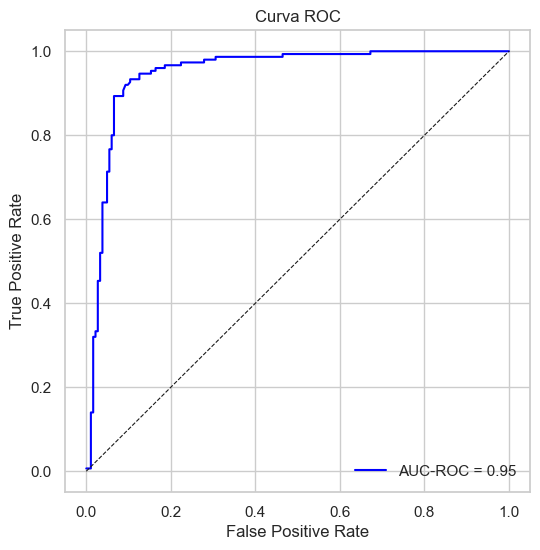

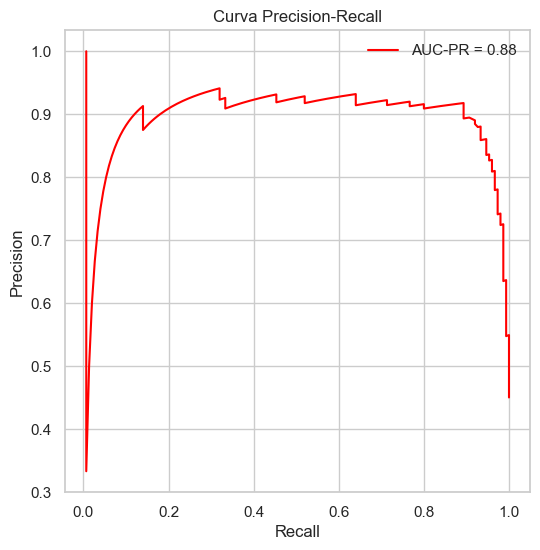

In [5]:


# Debugging: Verificar split
display(Markdown("#### Shape después del split"))
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

# Convertimos a arrays de numpy y nos aseguramos de que sean float64
# X_train = X_train.values.astype(np.float64)
# X_val = X_val.values.astype(np.float64)
# y_train = y_train.values.astype(np.float64)
# y_val = y_val.values.astype(np.float64)

lambda_values = [0.001, 0.01, 0.1, 1.0]

# Inicializamos variables para encontrar el mejor lambda
best_fscore = 0
best_lambda = None

# Probamos diferentes valores de lambda
display(Markdown("### Búsqueda del mejor lambda basado en F1-Score"))
results = []

for lambda_val in lambda_values:
    # Entrenamos el modelo con el lambda actual
    model = LogisticRegression(X_train, y_train, l2=lambda_val)
    model.fit_gradient_descent()
    
    # Evaluamos el modelo
    metrics = model.evaluate(X_val, y_val)
    fscore = metrics['F1-Score']
    
    # Guardamos los resultados
    results.append({
        'Lambda': lambda_val,
        'F1-Score': fscore
    })
    
    # Actualizamos el mejor lambda si encontramos un mejor F1-Score
    if fscore > best_fscore:
        best_fscore = fscore
        best_lambda = lambda_val

# Mostramos los resultados
results_df = pd.DataFrame(results)
pretty_print_df(results_df, title="Resultados de la búsqueda de lambda")

print(f"\nMejor lambda encontrado: {best_lambda} (F1-Score: {best_fscore:.4f})")

# Entrenamos el modelo final con el mejor lambda
display(Markdown("### Modelo Final"))
final_model = LogisticRegression(X_train, y_train, l2=best_lambda)
final_model.fit_gradient_descent()

# Debugging: Verificar pesos del modelo
display(Markdown("#### Verificación de pesos del modelo"))
final_model.print_coefficients()

# Evaluamos el modelo final
final_metrics = final_model.evaluate(X_val, y_val)

# Mostramos las métricas finales
display(Markdown("#### Métricas del Modelo Final"))
metrics_df = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'AUC-PR'],
    'Valor': [
        final_metrics['Accuracy'],
        final_metrics['Precision'],
        final_metrics['Recall'],
        final_metrics['F1-Score'],
        final_metrics['AUC-ROC'],
        final_metrics['AUC-PR']
    ]
})
pretty_print_df(metrics_df, title="Métricas del modelo final")

# Mostramos la matriz de confusión
display(Markdown("#### Matriz de Confusión"))
conf_matrix = pd.DataFrame(
    final_metrics['Matriz de Confusión'],
    columns=['Predicción Negativa', 'Predicción Positiva'],
    index=['Real Negativa', 'Real Positiva']
)
pretty_print_df(conf_matrix, title="Matriz de confusión",index=True)

# Graficamos las curvas ROC y PR
display(Markdown("#### Curvas de Evaluación"))
final_model.plot_curves(X_val, y_val)

1.3. Utilizando el conjunto de datos de test cell_diagnosis_balanced_test.csv, evalúe
la performance del modelo desarrollado anteriormente computando las métricas
de performance indicadas en el inciso 1.2

Columna 'CellSize': 14 outliers (7.57%)
Columna 'CellShape': 12 outliers (6.49%)
Columna 'NucleusDensity': 16 outliers (8.65%)
Columna 'ChromatinTexture': 7 outliers (3.78%)
Columna 'CytoplasmSize': 8 outliers (4.32%)
Columna 'CellAdhesion': 14 outliers (7.57%)
Columna 'MitosisRate': 18 outliers (9.73%)
Columna 'NuclearMembrane': 13 outliers (7.03%)
Columna 'GrowthFactor': 12 outliers (6.49%)
Columna 'OxygenSaturation': 11 outliers (5.95%)
Columna 'Vascularization': 10 outliers (5.41%)
Columna 'InflammationMarkers': 7 outliers (3.78%)


### Evaluación del modelo en el dataset de test

### Métricas del modelo en el dataset de test

| Métrica   |    Valor |
|:----------|---------:|
| Accuracy  | 0.908108 |
| Precision | 0.934211 |
| Recall    | 0.855422 |
| F1-Score  | 0.893082 |
| AUC-ROC   | 0.939995 |
| AUC-PR    | 0.881416 |

#### Matriz de Confusión en el dataset de test

### Matriz de confusión en el dataset de test

|               |   Predicción Negativa |   Predicción Positiva |
|:--------------|----------------------:|----------------------:|
| Real Negativa |                    97 |                     5 |
| Real Positiva |                    12 |                    71 |

#### Curvas de Evaluación en el dataset de test

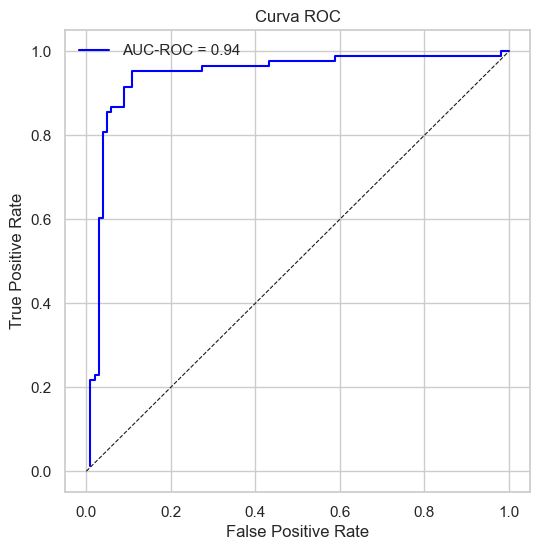

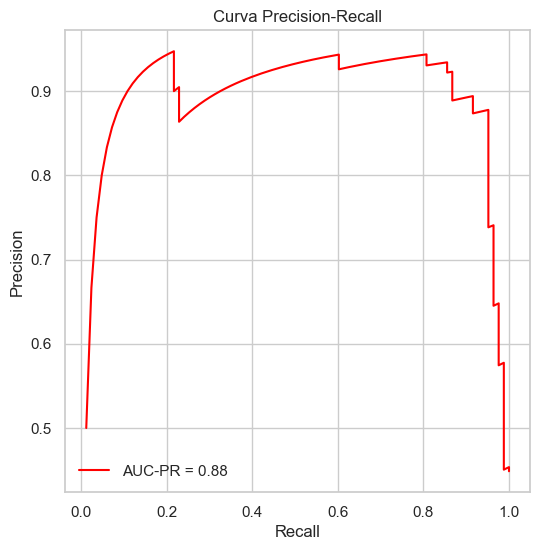

In [6]:
test_df = cell_balanced_test

# Preprocesamos el dataset de test
X_test = test_df.drop('Diagnosis', axis=1)
y_test = test_df['Diagnosis']
X_test = handle_outliers(X_test)
X_test = handle_missing_values(X_test)
X_test = one_hot_encoding(X_test, categorical_columns)
X_test['CellType_Epthlial'] = X_test['CellType_Nan'] + X_test['CellType_Epthlial']
X_test = X_test.drop(columns=['CellType_Nan', 'CellType_Mesnchymal','GeneticMutation_Absnt','GeneticMutation_Nan'])
X_test['CellType_Epthlial'] = (X_test['CellType_Epthlial'] > 0.5).astype(int)
X_test = X_test.values.astype(np.float64)
y_test = y_test.values.astype(np.float64)

# Evaluamos el modelo en el dataset de test
display(Markdown("### Evaluación del modelo en el dataset de test"))
test_metrics = final_model.evaluate(X_test, y_test)

# Mostramos las métricas del modelo en el dataset de test
metrics_test_df = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'AUC-PR'],
    'Valor': [
        test_metrics['Accuracy'],
        test_metrics['Precision'],
        test_metrics['Recall'],
        test_metrics['F1-Score'],
        test_metrics['AUC-ROC'],
        test_metrics['AUC-PR']
    ]
})
pretty_print_df(metrics_test_df, title="Métricas del modelo en el dataset de test")

# Mostramos la matriz de confusión en el dataset de test
display(Markdown("#### Matriz de Confusión en el dataset de test"))
conf_matrix_test = pd.DataFrame(
    test_metrics['Matriz de Confusión'],
    columns=['Predicción Negativa', 'Predicción Positiva'],
    index=['Real Negativa', 'Real Positiva']
)

pretty_print_df(conf_matrix_test, title="Matriz de confusión en el dataset de test",index=True)

# Graficamos las curvas ROC y PR en el dataset de test
display(Markdown("#### Curvas de Evaluación en el dataset de test"))

final_model.plot_curves(X_test, y_test)

#### 1.4. Rebalanceo de Clases en Conjuntos Desbalanceados
Utilizando el conjunto de datos de desarrollo cell_diagnosis_imbalanced_dev.csv,
dividir los datos en 80 % entrenamiento y 20 % validación. Entrenar distintos
modelos de regresión logística binaria con regularización L2, aplicando una técnica
de re-balanceo distinta en cada caso:

1) Sin rebalanceo: entrenar el modelo directamente sobre los datos desbalancea-
dos.
2) Undersampling: eliminar muestras de la clase mayoritaria de manera aleatoria
hasta que ambas clases tengan igual proporción.
3) Oversampling mediante duplicación: duplicar muestras de la clase minoritaria
de manera aleatoria, hasta que que ambas clases tengan igual proporción.
4) Oversampling mediante SMOTE (Synthetic Minority Oversampling Techni-
que): hasta que ambas clases tengan igual proporción.
5) Cost re-weighting: en la función de costo, multiplicar los terminos que de-
penden de las muestras de la clase minoritaria por un factor C =π2
π1 , donde
π1 es la probabilidad a-priori de la clase minoritoria y π2 el de la clase ma-
yoritaria. Esto efectivamente re-balancea la importancia de tener errores de
clasificacion de ambas clases.
Evalúe el desempeño de cada modelo sobre el conjunto de validación utilizando
las métricas indicadas en el inciso 1.2. Para las curvas PR y ROC, grafique las
curvas de cada modelo sobre el mismo grafico, de manera de poder comparar las
características de cada uno. Para las metricas de performance escalares, ponga los
resultados de cada modelo en una sola tabla, como se muestra a continuación:

In [11]:
#### 1.4. Rebalanceo de Clases en Conjuntos Desbalanceados
# Utilizando el conjunto de datos de desarrollo cell_diagnosis_imbalanced_dev.csv,
# dividir los datos en 80 % entrenamiento y 20 % validación. Entrenar distintos
# modelos de regresión logística binaria con regularización L2, aplicando una técnica
# de re-balanceo distinta en cada caso:

# 1) Sin rebalanceo: entrenar el modelo directamente sobre los datos desbalancea-
# dos.
# 2) Undersampling: eliminar muestras de la clase mayoritaria de manera aleatoria
# hasta que ambas clases tengan igual proporción.
# 3) Oversampling mediante duplicación: duplicar muestras de la clase minoritaria
# de manera aleatoria, hasta que que ambas clases tengan igual proporción.
# 4) Oversampling mediante SMOTE (Synthetic Minority Oversampling Techni-
# que): hasta que ambas clases tengan igual proporción.
# 5) Cost re-weighting: en la función de costo, multiplicar los terminos que de-
# penden de las muestras de la clase minoritaria por un factor C =π2
# π1 , donde
# π1 es la probabilidad a-priori de la clase minoritoria y π2 el de la clase ma-
# yoritaria. Esto efectivamente re-balancea la importancia de tener errores de
# clasificacion de ambas clases.
# Evalúe el desempeño de cada modelo sobre el conjunto de validación utilizando
# las métricas indicadas en el inciso 1.2. Para las curvas PR y ROC, grafique las
# curvas de cada modelo sobre el mismo grafico, de manera de poder comparar las
# características de cada uno. Para las metricas de performance escalares, ponga los
# resultados de cada modelo en una sola tabla, como se muestra a continuación:

dev = cell_imbalanced_dev
X = dev.drop('Diagnosis', axis=1)
y = dev['Diagnosis']
X = handle_outliers(X)
X = handle_missing_values(X)
X = one_hot_encoding(X, categorical_columns)
X['CellType_Epthlial'] = X['CellType_Nan'] + X['CellType_Epthlial']
X = X.drop(columns=['CellType_Nan', 'CellType_Mesnchymal','GeneticMutation_Absnt','GeneticMutation_Nan'])
X['CellType_Epthlial'] = (X['CellType_Epthlial'] > 0.5).astype(int)
# X = X.values.astype(np.float64)
# y = y.values.astype(np.float64)
# volver a juntar X e y para el split
dev = pd.DataFrame(X, columns=X.columns)
dev['Diagnosis'] = y

# Dividimos los datos en train y validation
train_df, val_df = train_val_split(dev, test_size=0.2)
X_train = train_df.drop('Diagnosis', axis=1)
y_train = train_df['Diagnosis']
X_val = val_df.drop('Diagnosis', axis=1)
y_val = val_df['Diagnosis']

# 1) Sin rebalanceo
display(Markdown("#### Sin rebalanceo"))
model = LogisticRegression(X_train, y_train, l2=best_lambda)
model.fit_gradient_descent()
metrics = model.evaluate(X_val, y_val)
pretty_print_df(metrics, title="Métricas del modelo sin rebalanceo")
model.plot_curves(X_val, y_val)


# 2) Undersampling
display(Markdown("#### Undersampling"))
X_train = pd.DataFrame(X, columns=X.columns)
y_train = pd.Series(y, name='Diagnosis')    

# Contamos la cantidad de muestras por clase
class_counts = y_train.value_counts()
print(f"Cantidad de muestras por clase:\n{class_counts}")
# Encontramos la clase mayoritaria y minoritaria    
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()
majority_count = class_counts.max()
minority_count = class_counts.min()
# Calculamos la cantidad de muestras a eliminar de la clase mayoritaria
samples_to_remove = majority_count - minority_count
# Obtenemos los índices de las muestras de la clase mayoritaria
majority_indices = y_train[y_train == majority_class].index.tolist()
# Seleccionamos aleatoriamente los índices a eliminar
random_indices = np.random.choice(majority_indices, samples_to_remove, replace=False)
# Eliminamos las muestras seleccionadas del conjunto de entrenamiento
X_train = X_train.drop(index=random_indices)
y_train = y_train.drop(index=random_indices)
# Verificamos la nueva distribución de clases
class_counts = y_train.value_counts()
print(f"Distribución de clases después de undersampling:\n{class_counts}")
# Entrenamos el modelo con undersampling
model = LogisticRegression(X_train, y_train, l2=best_lambda)
model.fit_gradient_descent()
metrics = model.evaluate(X_val, y_val)
pretty_print_df(metrics, title="Métricas del modelo con undersampling")
model.plot_curves(X_val, y_val)

# 3) Oversampling mediante duplicación
display(Markdown("#### Oversampling mediante duplicación"))
# Contamos la cantidad de muestras por clase
class_counts = y_train.value_counts()


Columna 'CellSize': 62 outliers (5.09%)
Columna 'CellShape': 57 outliers (4.68%)
Columna 'NucleusDensity': 78 outliers (6.40%)
Columna 'ChromatinTexture': 43 outliers (3.53%)
Columna 'CytoplasmSize': 43 outliers (3.53%)
Columna 'CellAdhesion': 59 outliers (4.84%)
Columna 'MitosisRate': 80 outliers (6.57%)
Columna 'NuclearMembrane': 54 outliers (4.43%)
Columna 'GrowthFactor': 66 outliers (5.42%)
Columna 'OxygenSaturation': 61 outliers (5.01%)
Columna 'Vascularization': 50 outliers (4.11%)
Columna 'InflammationMarkers': 35 outliers (2.87%)


#### Sin rebalanceo

AttributeError: 'dict' object has no attribute 'to_markdown'

Columna 'CellSize': 62 outliers (5.09%)
Columna 'CellShape': 57 outliers (4.68%)
Columna 'NucleusDensity': 78 outliers (6.40%)
Columna 'ChromatinTexture': 43 outliers (3.53%)
Columna 'CytoplasmSize': 43 outliers (3.53%)
Columna 'CellAdhesion': 59 outliers (4.84%)
Columna 'MitosisRate': 80 outliers (6.57%)
Columna 'NuclearMembrane': 54 outliers (4.43%)
Columna 'GrowthFactor': 66 outliers (5.42%)
Columna 'OxygenSaturation': 61 outliers (5.01%)
Columna 'Vascularization': 50 outliers (4.11%)
Columna 'InflammationMarkers': 35 outliers (2.87%)


#### Sin rebalanceo

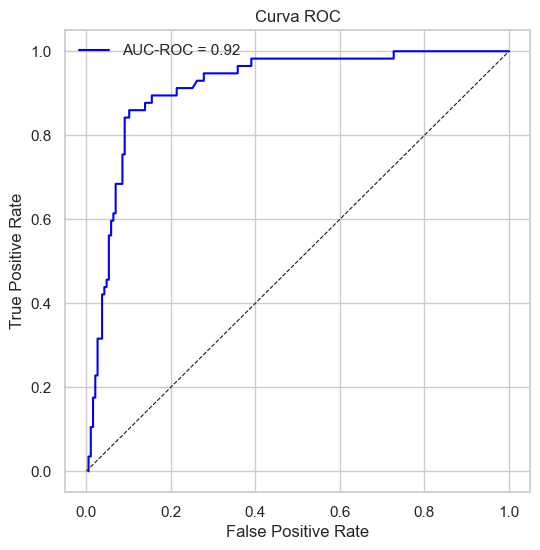

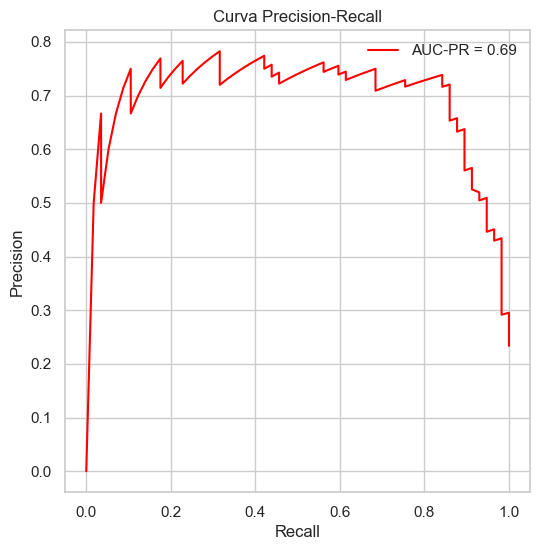

#### Undersampling

ValueError: Data must be 1-dimensional, got ndarray of shape (2, 2) instead

In [ ]:
#### 1.4. Rebalanceo de Clases en Conjuntos Desbalanceados
# Utilizando el conjunto de datos de desarrollo cell_diagnosis_imbalanced_dev.csv,
# dividir los datos en 80 % entrenamiento y 20 % validación. Entrenar distintos
# modelos de regresión logística binaria con regularización L2, aplicando una técnica
# de re-balanceo distinta en cada caso:

# 1) Sin rebalanceo: entrenar el modelo directamente sobre los datos desbalancea-
# dos.
# 2) Undersampling: eliminar muestras de la clase mayoritaria de manera aleatoria
# hasta que ambas clases tengan igual proporción.
# 3) Oversampling mediante duplicación: duplicar muestras de la clase minoritaria
# de manera aleatoria, hasta que que ambas clases tengan igual proporción.
# 4) Oversampling mediante SMOTE (Synthetic Minority Oversampling Techni-
# que): hasta que ambas clases tengan igual proporción.
# 5) Cost re-weighting: en la función de costo, multiplicar los terminos que de-
# penden de las muestras de la clase minoritaria por un factor C =π2
# π1 , donde
# π1 es la probabilidad a-priori de la clase minoritoria y π2 el de la clase ma-
# yoritaria. Esto efectivamente re-balancea la importancia de tener errores de
# clasificacion de ambas clases.
# Evalúe el desempeño de cada modelo sobre el conjunto de validación utilizando
# las métricas indicadas en el inciso 1.2. Para las curvas PR y ROC, grafique las
# curvas de cada modelo sobre el mismo grafico, de manera de poder comparar las
# características de cada uno. Para las metricas de performance escalares, ponga los
# resultados de cada modelo en una sola tabla, como se muestra a continuación:

dev = cell_imbalanced_dev
X = dev.drop('Diagnosis', axis=1)
y = dev['Diagnosis']
X = handle_outliers(X)
X = handle_missing_values(X)
X = one_hot_encoding(X, categorical_columns)
X['CellType_Epthlial'] = X['CellType_Nan'] + X['CellType_Epthlial']
X = X.drop(columns=['CellType_Nan', 'CellType_Mesnchymal','GeneticMutation_Absnt','GeneticMutation_Nan'])
X['CellType_Epthlial'] = (X['CellType_Epthlial'] > 0.5).astype(int)
# volver a juntar X e y para el split
dev = pd.DataFrame(X, columns=X.columns)
dev['Diagnosis'] = y

# Dividimos los datos en train y validation
train_df, val_df = train_val_split(dev, test_size=0.2)
X_train = train_df.drop('Diagnosis', axis=1)
y_train = train_df['Diagnosis']
X_val = val_df.drop('Diagnosis', axis=1)
y_val = val_df['Diagnosis']

# 1) Sin rebalanceo
display(Markdown("#### Sin rebalanceo"))
model = LogisticRegression(X_train, y_train, l2=best_lambda)
model.fit_gradient_descent()
metrics = model.evaluate(X_val, y_val)
pretty_print_df(metrics, title="Métricas del modelo sin rebalanceo")
model.plot_curves(X_val, y_val)

display(Markdown("#### Undersampling"))

# Concatenamos X_train y y_train para facilitar el muestreo
train_df_us = pd.concat([X_train, y_train], axis=1)

# Contamos las clases
class_counts = train_df_us['Diagnosis'].value_counts()
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()
n_minority = class_counts.min()

# Hacemos undersampling: igualamos las cantidades
minority_df = train_df_us[train_df_us['Diagnosis'] == minority_class]
majority_df = train_df_us[train_df_us['Diagnosis'] == majority_class].sample(n=n_minority, random_state=42)

# Juntamos ambos subconjuntos
balanced_df = pd.concat([minority_df, majority_df])
X_us = balanced_df.drop('Diagnosis', axis=1)
y_us = balanced_df['Diagnosis']

# Entrenamos el modelo
model_us = LogisticRegression(X_us, y_us, l2=best_lambda)
model_us.fit_gradient_descent()
metrics_us = model_us.evaluate(X_val, y_val)

# Mostramos métricas
pretty_print_df(metrics_us, title="Métricas del modelo con undersampling")

# Curvas PR y ROC
model_us.plot_curves(X_val, y_val)
